## Measurement This, Not That: Optimizing the Cost and Model-Based Information Content of Measurements

Authors: Jialu Wang, Zedong Peng, Ryan Hughes, Debangsu Bhattacharyya, David E. Bernal Neira, Alexander W. Dowling

This notebook contains code to reproduce the results for paper: Measurement This, Not That: Optimizing the Cost and Model-Based Information Content of Measurements

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [5]:
# A-optimality labels
label_minlp = "MILP: A-optimality"
label_nlp = "LP: A-optimality"
# MILP color and scatter
color_minlp = "red"
scatter_minlp = "*"
# LP color and scatter
color_nlp = "blue"
scatter_nlp = "."
# A-optimality marker size
marker_size=10

# D-optimality lables 
optD_label_minlp = "MINLP: D-optimality"
optD_label_nlp = "NLP: D-optimality"
# MINLP color and scatter
optD_color_minlp = "green"
optD_scatter_minlp = "X"
# NLP color and scatter
optD_color_nlp = "purple"
optD_scatter_nlp = "s"
# D-optimailty marker size
optD_marker_size=5

In [6]:
# kinetics problem mixed-integer problem ranges
x_gurobi = [1000, 1400, 1800, 2200, 
         2600, 3000, 3400, 3800, 
         4200, 4600, 5000]
# tick labels use k as unit, so divide each number by 1000
x_gurobi_legend = [i/1000 for i in x_gurobi]

# kinetics problem relaxed problem ranges
nlp_ranges = np.linspace(1000, 5000, 41)
nlp_ranges = [int(i) for i in nlp_ranges]
# tick labels use k as unit, so divide each number by 1000
nlp_label = [i/1000 for i in nlp_ranges]


# rotary problem ranges 
rotary_ranges = np.linspace(1000, 25000, 25)
rotary_ranges = [int(i) for i in rotary_ranges]
# tick labels use k as unit, so divide each number by 1000
rotary_label = [i/1000 for i in rotary_ranges]

## Fig.3, 6: Draw A-, D-optimality figures for all four optimization strategies 

draw Fig.3 in kinetics case study, and Fig.6 in rotary bed case study

In [4]:
def plot_data(x_nlp=None, 
              x_minlp=None,
              a_nlp=None, 
              optD_a_nlp=None, 
              a_minlp=None, 
              optD_a_minlp=None, 
              d_nlp=None, 
              d_minlp=None, 
              optD_d_nlp= None, 
              optD_d_minlp=None, 
              save=None):
    """
    This function plots two figures, 
    figure 1: A-optimality value of all optimization strategies provided 
    figure 2: D-optimality value of all optimization strategies provided
    
    Arguments 
    ---------
    x_nlp: x ranges for the relaxed problem
    x_minlp: x ranges for the mixed-integer problem
    
    a_nlp: A-opt. of LP problem maximizing A-opt.
    optD_a_nlp: A-opt. of NLP problem maximizing D-opt.
    a_minlp: A-opt. of MILP problem maximizing A-opt.
    optD_a_minlp:: A-opt. of MINLP problem maximizing D-opt.
    
    d_nlp: D-opt. of LP problem maximizing A-opt.
    d_minlp: D-opt. of MILP problem maximizing A-opt. 
    optD_d_nlp: D-opt. of NLP problem maximizing D-opt.
    optD_d_minlp: D-opt. of MINLP problem maximizing D-opt.
    
    save: if given a string, save the figures as .pdf with this name
    """
    # axes and tick font size
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    # legend font size
    si_legend = 16
        
    # figure 1: A-optimality of four optimization strategies
    # A-opt LP
    if a_nlp is not None:
        plt.plot(x_nlp, np.log10(a_nlp), linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
    # D-opt NLP
    if optD_a_nlp is not None: 
        plt.plot(x_nlp, np.log10(optD_a_nlp), linestyle="-.", color=optD_color_nlp, 
                 markersize=optD_marker_size, marker=optD_scatter_nlp, label=optD_label_nlp)
    # A-opt MILP
    if a_minlp is not None:
        plt.scatter(x_minlp, np.log10(a_minlp), marker=scatter_minlp, s=200, 
                    color=color_minlp, label=label_minlp)
    # D-opt MINLP
    if optD_a_minlp is not None:
        plt.scatter(x_minlp, np.log10(optD_a_minlp), marker=optD_scatter_minlp, s=200, 
                    color=optD_color_minlp, label=optD_label_minlp)
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    # for now we don't plot legend. keep for reference
    # plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2: D-optimality of the four optimization strategies
    # A-opt LP
    if d_nlp is not None: 
        plt.plot(x_nlp, np.log10(d_nlp), linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
    # A-opt MILP
    if d_minlp is not None:
        plt.scatter(x_minlp, np.log10(d_minlp), marker=scatter_minlp, s=200, color=color_minlp, 
                    label=label_minlp)
    # D-opt NLP
    if optD_d_nlp is not None: 
        plt.plot(x_nlp, np.log10(optD_d_nlp), linestyle="-", color=optD_color_nlp, markersize=optD_marker_size, 
                 marker=optD_scatter_nlp, label=optD_label_nlp)
    # D-opt MINLP
    if optD_d_minlp is not None:
        plt.scatter(x_minlp, np.log10(optD_d_minlp), marker=optD_scatter_minlp, s=200, color=optD_color_minlp, 
                    label=optD_label_minlp)
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    # for now we don't plot legend. keep for reference
    # plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()

In [2]:
def read_fim(name_str, ranges, obj="_a"):
    """
    Read FIM from a list of .pickle files containing the FIM in budget ranges
    file name should be name_str + ranges[i] + obj,
    for e.g., LP_fim_1000_a means the A-optimality LP problem FIM of the budget 1000
    
    Arguments
    ---------
    name_str: the first part of the result file
    ranges: a list of all the budgets 
    obj: "_a" means A-optimality, '_d' means D-optimality
    
    Return 
    ------
    a_set: a list of A-optimality values of the FIM in ranges
    d_set: a list of D-optimality values of the FIM in ranges
    """
    # read the A-, D-opt. values
    a_set, d_set = [], []
    
    # loop over the budget range to read all files
    for i in ranges:
        # retrieve name
        name = name_str + str(i) + obj
        # open pickle
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        # add to A-, D-opt. lists
        a_set.append(np.trace(x))
        d_set.append(np.linalg.det(x))
        
    return a_set, d_set

## Kinetics, Fig. 3

In [7]:
# result file path 
kinetics_path = "./kinetics_results/"

lp_pre_name = 'LP_fim_'
milp_pre_name = 'MILP_fim_'
nlp_pre_name = 'NLP_fim_'
minlp_pre_name = 'MINLP_fim_'

In [8]:
# read A-optimality LP results
nlp_a, nlp_d = read_fim(kinetics_path+lp_pre_name, nlp_ranges)
# read A-optimality MILP results
gurobi_a_file, gurobi_d_file = read_fim(kinetics_path+milp_pre_name,x_gurobi)
# read D-optimality NLP results
d_nlp_a, d_nlp_d = read_fim(kinetics_path+nlp_pre_name, nlp_ranges, obj="_d")
# read D-optimality MINLP results
mindt_a_file, mindt_d_file = read_fim(kinetics_path+minlp_pre_name,x_gurobi, obj="_d")

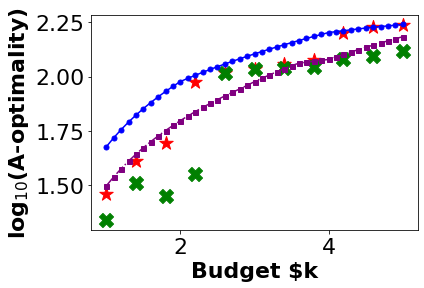

/tmp/ipykernel_851991/3311500091.py:79: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(x_minlp, np.log10(d_minlp), marker=scatter_minlp, s=200, color=color_minlp,


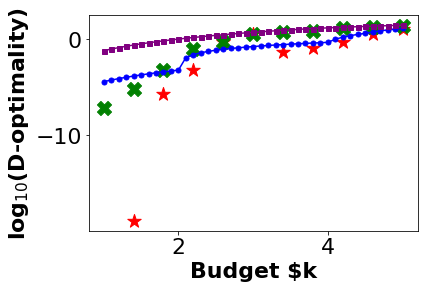

In [8]:
# plot data
# TODO: should change more clear names for arguments. pending for now
plot_data(
        x_nlp = nlp_label, # x ranges for relaxed problem  
        x_minlp = x_gurobi_legend, # x ranges for mixed-integer problem
        a_nlp = nlp_a, # A-opt. of LP problem maximizing A-opt
        optD_a_nlp = d_nlp_a, # A-opt of NLP problem maximizing D-opt
        a_minlp=gurobi_a_file, # A-opt of MILP problem maximizing A-opt
        optD_a_minlp=mindt_a_file, # A-opt of MINLP problem maximizing D-opt
        d_nlp =nlp_d, # D-opt of LP problem maximizing A-opt
        d_minlp = gurobi_d_file, # D-opt of MILP problem maximizing A-opt
        optD_d_nlp = d_nlp_d, # D-opt of NLP problem maximizing D-opt
        optD_d_minlp=mindt_d_file, # D-opt of MINLP problem maximizing D-opt
        save='kinetics_merge') # figure save name 

## Rotary bed, Fig. 6

In [9]:
# result file path 
rotary_path = "./rotary_results/"

lp_pre_name = 'LP_fim_'
milp_pre_name = 'MILP_fim_'
nlp_pre_name = 'NLP_fim_'
minlp_pre_name = 'MINLP_fim_'

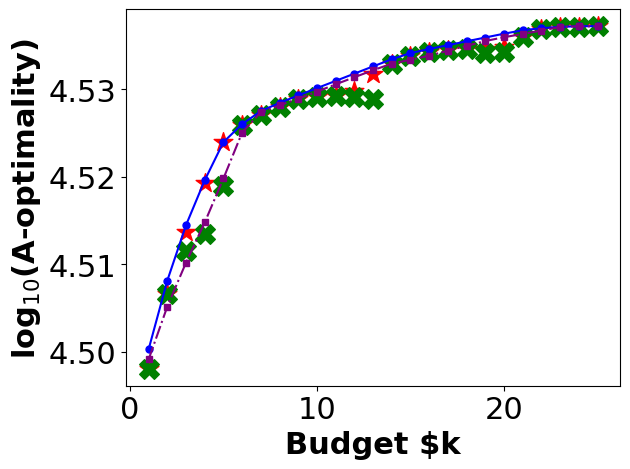

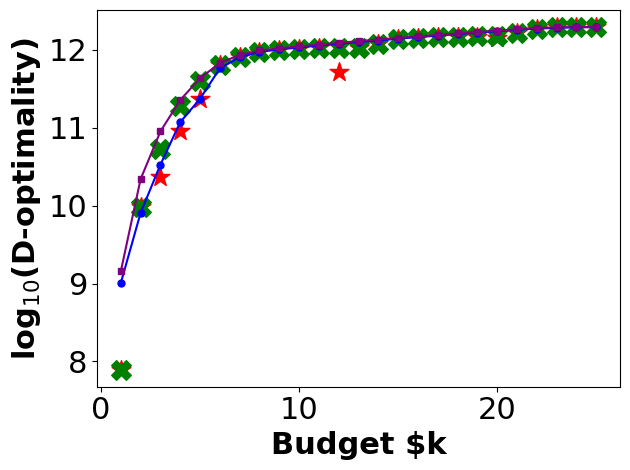

In [12]:
# A-opt. LP
nlp_a_file, nlp_d_file = read_fim(rotary_path+lp_pre_name, rotary_ranges)
# A-opt. MILP
a_gurobi, d_gurobi = read_fim(rotary_path+milp_pre_name, rotary_ranges)
# D-opt. NLP
optD_nlp_a_file, optD_nlp_d_file = read_fim(rotary_path+nlp_pre_name, rotary_ranges, obj="_d")
# D-opt. MINLP
optD_minlp_a_file, optD_minlp_d_file = read_fim(rotary_path+minlp_pre_name, rotary_ranges, obj="_d")


# plot data
plot_data(
        x_nlp = rotary_label, # x ranges for relaxed problem
        x_minlp = rotary_label, # x ranges for mixed-integer problem
        a_nlp = nlp_a_file, # A-opt of LP problem maximizing A-opt
        optD_a_nlp = optD_nlp_a_file, # A-opt of NLP problem maximizing D-opt
        a_minlp=a_gurobi, # A-opt of MILP problem maximizing A-opt
        optD_a_minlp=optD_minlp_a_file, # A-opt of MINLP problem maximizing D-opt
        d_nlp =nlp_d_file, # D-opt of LP problem maximizing A-opt
        optD_d_nlp = optD_nlp_d_file, # D-opt of MILP problem maximizing A-opt
        d_minlp = d_gurobi, # D-opt of NLP problem maximizing D-opt
        optD_d_minlp=optD_minlp_d_file, # D-opt of MINLP problem maximizing D-opt 
        save='rotary_merge') # figure save with this name



## Fig. Cvxpy comparison, A-optimality MILP and D-optimality NLP

In [11]:
def plot_data(x = None, 
              cvxpy_trace = None, 
              cvxpy_det = None, 
              pyomo_trace = None, 
              pyomo_det = None,
              save=None):
    """
    This function plots two figures, 
    figure 1: A-optimality value of all optimization strategies provided 
    figure 2: D-optimality value of all optimization strategies provided
    
    Arguments 
    ---------
    x: x ranges for the problem
    
    cvxpy_trace: A-opt. of CVXPY problem solutions.
    cvxpy_det: D-opt. of CVXPY problem solutions.
    pyomo_trace: A-opt. of Pyomo problem solutions.
    pyomo_det: D-opt. of Pyomo problem solutions.

    save: if given a string, save the figures as .pdf with this name
    """
    # axes and tick font size
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    # legend font size
    si_legend = 16
        
    # A-optimality of solutions 
    plt.scatter(x, cvxpy_trace, marker="^", s=200, 
                color="green", label="Cvxpy sol.")

    plt.scatter(x, pyomo_trace, marker=scatter_minlp, s=200, 
                color=color_minlp, label="Pyomo sol.")
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('A-optimality', fontweight="bold")
    # for now we don't plot legend. keep for reference
    plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_trace.pdf')
    plt.show()
    

    # figure 2: D-optimality of solutions
    
    plt.scatter(x, cvxpy_det, marker="^", color="green", s=200, 
         label="Cvxpy sol.")

    plt.scatter(x, pyomo_det, marker=scatter_minlp, s=200, color=color_minlp, 
                label="Pyomo sol.")
        
        
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('D-optimality', fontweight="bold")
    # for now we don't plot legend. keep for reference
    plt.legend(fontsize=si_legend)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save+'_det.pdf')
    plt.show()

In [11]:
### D-optimality NLP

# result file path 
cvxpy_path = "./cvxpy_results/"

cvxpy_nlp_pre_name = 'cvxpy_D_fim_'

# D-opt. NLP
cvxpy_nlp_a, cvxpy_nlp_d = read_fim(cvxpy_path+cvxpy_nlp_pre_name, x_gurobi, obj="")

# NLP pyomo
d_nlp_a, d_nlp_d = read_fim(kinetics_path+nlp_pre_name, x_gurobi, obj="_d")



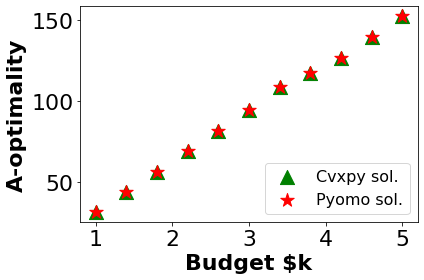

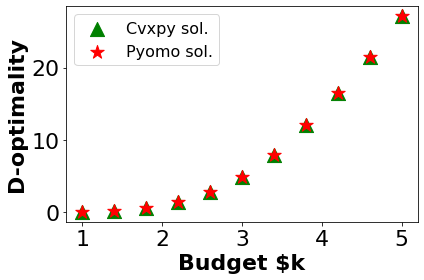

In [13]:
plot_data(x = x_gurobi_legend, 
          cvxpy_trace = cvxpy_nlp_a, 
          cvxpy_det = cvxpy_nlp_d, 
          pyomo_trace = d_nlp_a,
          pyomo_det = d_nlp_d,
          save="cvxpy_D_")

In [17]:
### A-optimality MILP solutions

# result file path
cvxpy_path = "./cvxpy_results/"

cvxpy_nlp_pre_name = 'cvxpy_A_fim_'

# D-opt. NLP
cvxpy_nlp_a, cvxpy_nlp_d = read_fim(cvxpy_path+cvxpy_nlp_pre_name, x_gurobi, obj="")

# NLP pyomo
d_milp_a, d_milp_d = read_fim(kinetics_path+milp_pre_name, x_gurobi)

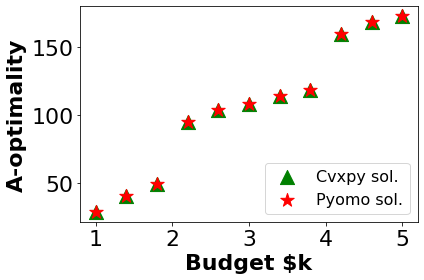

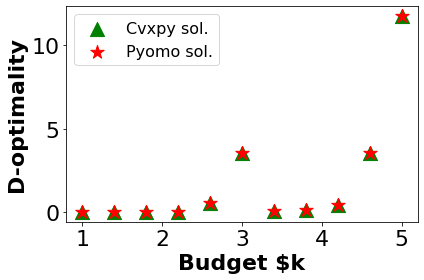

In [19]:
plot_data(x = x_gurobi_legend, 
          cvxpy_trace = cvxpy_nlp_a, 
          cvxpy_det = cvxpy_nlp_d, 
          pyomo_trace = d_milp_a,
          pyomo_det = d_milp_d,
          save="cvxpy_A_")

## Fig. S-1: Consider operating cost 

This is SI results Fig. S-1 for the kinetics case study

In [13]:
# we need to define a range since with operating cost, the ranges are different and deviate with 100 from 3000
operate_x = [1000, 1400, 1800, 2200, 2600, 3000, 3100, 3500, 3900, 4300, 4700, 5100]

# read the operating FIM results
# mindt_a_file2: a list of A-optimality of FIMs of budgets in operate_x
# mindt_d_file2: a list of D-optimality of FIMs of budgets in operate_x
mindt_a_file2, mindt_d_file2 = read_fim('./kinetics_results/Operate_fim_',operate_x, obj="_d_mip")

[21.795716787857867, 32.1574031080986, 28.129804055970467, 35.50114415400877, 45.52016393657081, 55.09464424169989, 108.30708632638974, 109.74575714302021, 110.13566897659004, 119.91472396275148, 124.02023241446473, 130.63535063584396]


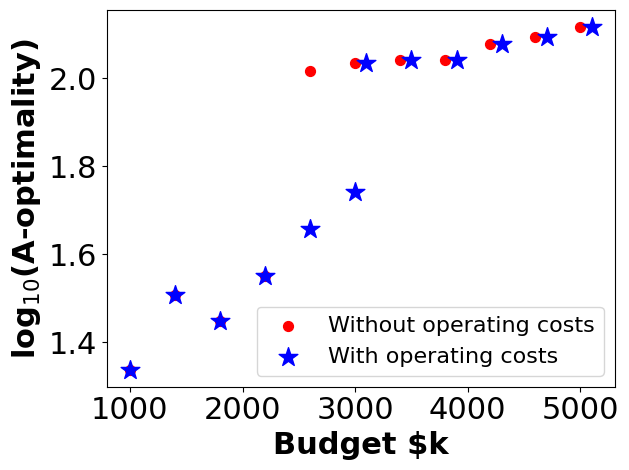

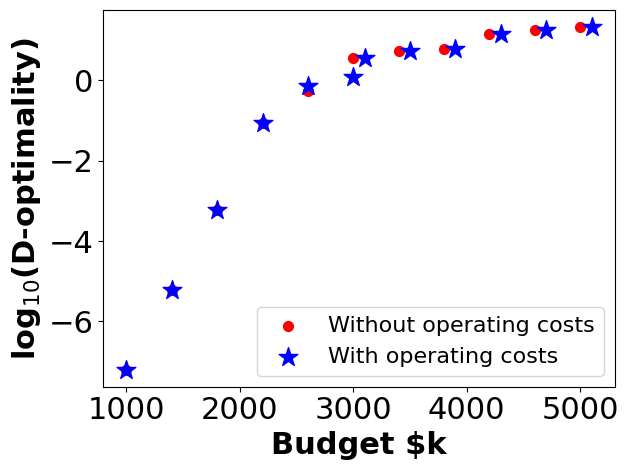

In [14]:
def compare_MINLP_with_operate(x1, x2, y1_a, y2_a, y1_b, y2_b):
    """
    This figure compares the MINLP results with the adding operation costs results 
    
    Arguments
    ---------
    x1: a list of budget ranges for the MINLP solution
    x2: a list of budget ranges for the operating cost solution
    y1_a: a list of A-optimality for MINLP solution
    y2_a: a list of A-optimality for operating cost solution 
    y1_b: a list of D-optimality for MINLP solution
    y2_b: a list of D-optimality for operating cost solution 
    """
    
    # define font size for axis title, lable, ticks
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    
    # plot A-optimality results comparison 
    # MINLP solution 
    plt.scatter(x1, np.log10(y1_a), marker=".", s=200, color="red", label = "Without operating costs")
    # operating cost solution
    plt.scatter(x2, np.log10(y2_a), marker="*", s=200, color="blue", label="With operating costs")
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(A-optimality)', fontweight="bold")
    plt.legend( fontsize=16)
    plt.tight_layout()
    plt.savefig('operate_trace.pdf')
    plt.show()
    
    # plot D-optimality results comparison 
    # MINLP solution 
    plt.scatter(x1, np.log10(y1_b), marker=".", s=200, color="red", label = "Without operating costs")
    # operating cost solution
    plt.scatter(x2, np.log10(y2_b), marker="*", s=200, color="blue", label="With operating costs")
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('log$_{10}$(D-optimality)', fontweight="bold")
    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig('operate_det.pdf')
    plt.show()
    
compare(x_gurobi, # a list of budget ranges for the MINLP solution
        operate_x, # a list of budget ranges for the operating cost solution
        mindt_a_file, # a list of A-optimality for MINLP solution
        mindt_a_file2, # a list of A-optimality for operating cost solution
        mindt_d_file, # a list of D-optimality for MINLP solution
        mindt_d_file2)# a list of D-optimality for operating cost solution 
    

## Fig. S-2: Solution visualize 

This is SI figure Fig. S-2.

In [15]:
def read_solution(name_str, ranges, obj="_a"):
    """
    Read solutions from data files 
    
    Arguments
    ---------
    name_str: string name of the file 
    ranges: the budget ranges 
    obj: "_a" means A-optimality, "_d" means D-optimality 
    
    for e.g., name_str is "LP_", budget ranges is [1000, 5000], "_a" is A-optimality,
        the file name is name_str+budget+"_a" = "LP_1000_a"
        this is corresponding to the way we name the result files
        
    Return:
    [ca_static, cb_static, cc_static, ca_dynamic, cb_dynamic, cc_dynamic]: 
        a list containing elements as above 
        ca_static: C_A solution as a static-cost measure, shape N_budget*1
        cb_static: C_B solution as a static-cost measure, shape N_budget*1
        cc_static: C_C solution as a static-cost measure, shape N_budget*1
        ca_dynamic: C_A solution as a dynamic-cost measure, shape N_budget*1
        cb_dynamic: C_B solution as a dynamic-cost measure, shape N_budget*1
        cc_dynamic: C_C solution as a dynamic-cost measure, shape N_budget*1
    """
    # initialize the list to store CA, CB, CC, as either SCM, and DCM
    ca_static = [] # length = len(ranges), element are in [0,1]
    cb_static = []
    cc_static = []
    ca_dynamic = [] # length = len(ranges), element are in [0,8], are the total numbers of selected measurements
    cb_dynamic = [] 
    cc_dynamic = [] 
    
    # assemble file name and read from pickle 
    for i in ranges:
        name = name_str + str(i) + obj
        with open(name, 'rb') as f:
            x = pickle.load(f)
        
        # CA as SCM decision is x[0][0]
        ca_static.append(x[0][0])
        # CB as SCM decision is x[1][1]
        cb_static.append(x[1][1])
        # CC as SCM decision is x[2][2]
        cc_static.append(x[2][2])
        
        # CA as DCM decision is from x[3][3] to x[11][11], diagonal elements
        ca_dynamic.append(sum(x[i][i] for i in range(3,11)))
        # CB as DCM decision is from x[11][11] to x[19][19], diagonal elements
        cb_dynamic.append(sum(x[i][i] for i in range(11,19)))
        # CC as DCM decision is from x[19][19] to x[27][27], diagonal elements
        cc_dynamic.append(sum(x[i][i] for i in range(19,27)))
        
    return [ca_static, cb_static, cc_static, ca_dynamic, cb_dynamic, cc_dynamic]
        

In [19]:
# nlp results
nlp_a_sol = read_solution('./kinetics_results/LP_', nlp_ranges)
milp_a_sol = read_solution('./kinetics_results/MILP_',x_gurobi)

nlp_d_sol = read_solution('./kinetics_results/NLP_', nlp_ranges, obj="_d")
minlp_d_sol = read_solution('./kinetics_results/MINLP_',x_gurobi, obj="_d")

In [20]:
def plot_one_solution(a_sol, a_mip_sol, d_sol, d_mip_sol, 
                     y_label, save_name):
    """
    plot one solution at four optimization strategies 
    
    Arguments
    ---------
    a_sol: a list of A-opt LP solution, shape N_budget*1
    a_mip_sol: a list of A-opt MILP solution, shape N_budget*1
    d_sol: a list of D-opt NLP solution, shape N_budget*1
    d_mip_sol: a list of D-opt MINLP solution, shape N_budget*1
    y_label: string of which measurement this is, for e.g. CA
    save_name: the string name this figure is saved with 
    """
    
    label_minlp = "MILP: A-optimality"
    
    label_nlp = "LP: A-optimality" 
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=10

    optD_label_minlp = "MINLP: D-optimality"
    optD_label_nlp = "NLP: D-optimality"
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5
        
        
    # define the font size for title, axis labels, tick labels 
    si=22
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    # legend font size. Not used but keep for reference
    si_legend = 16
    
    # plot LP solution
    plt.plot(nlp_label, a_sol, linestyle="-", color=color_nlp, markersize=marker_size, 
                 marker=scatter_nlp, label=label_nlp)
    # plot NLP solution
    plt.plot(nlp_label, d_sol, linestyle="-.", color=optD_color_nlp, markersize=optD_marker_size, 
                 marker=optD_scatter_nlp, label=optD_label_nlp)
    # plot MILP solution
    plt.scatter(x_gurobi_legend, a_mip_sol,  marker=scatter_minlp, s=200, 
                    color=color_minlp, label=label_minlp)
    # plot MINLP solution
    plt.scatter(x_gurobi_legend, d_mip_sol,  marker=optD_scatter_minlp, s=200, 
                    color=optD_color_minlp, label=optD_label_minlp)
    
    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel(y_label, fontweight="bold")
    #plt.legend(loc="upper left", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(save_name+'.pdf')
    plt.show()

def plot_solution(a_sol, a_mip_sol, d_sol, d_mip_sol):
    """
    Plot the solutions for CA, CB, CC at either SCM and DCM
    
    Arguments
    ---------
    a_sol: a list of solution for A-opt. LP problem, shape N_budget*6 (6 for CA, CB, CC as SCM and DCM)
    a_mip_sol: a list of solution for A-opt. MILP problem , shape N_budget*6
    d_sol: a list of solution for D-opt. NLP problem , shape N_budget*6
    d_mip_sol: a list of solution for D-opt. MINLP problem , shape N_budget*6
    """
    
    # static CA
    plot_one_solution(a_sol[0], a_mip_sol[0], d_sol[0], d_mip_sol[0], "C$_A$ Static", "CA_static_sol")
    plot_one_solution(a_sol[1], a_mip_sol[1], d_sol[1], d_mip_sol[1], "C$_B$ Static", "CB_static_sol")
    plot_one_solution(a_sol[2], a_mip_sol[2], d_sol[2], d_mip_sol[2], "C$_C$ Static", "CC_static_sol")
    
    # dynamic
    plot_one_solution(a_sol[3], a_mip_sol[3], d_sol[3], d_mip_sol[3], "C$_A$ Dynamic", "CA_dynamic_sol")
    plot_one_solution(a_sol[4], a_mip_sol[4], d_sol[4], d_mip_sol[4], "C$_B$ Dynamic", "CB_dynamic_sol")
    plot_one_solution(a_sol[5], a_mip_sol[5], d_sol[5], d_mip_sol[5], "C$_C$ Dynamic", "CC_dynamic_sol")
    
    

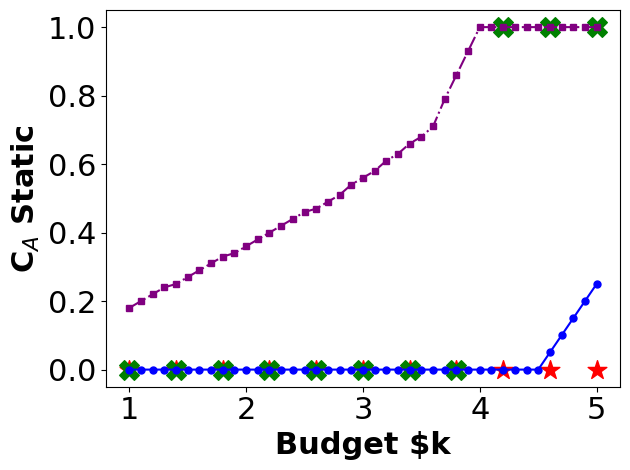

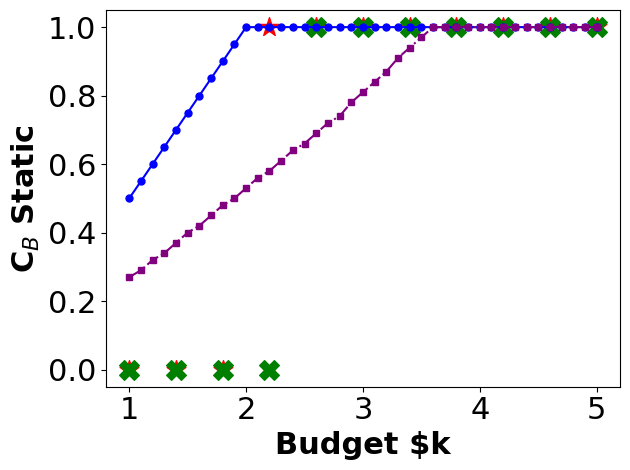

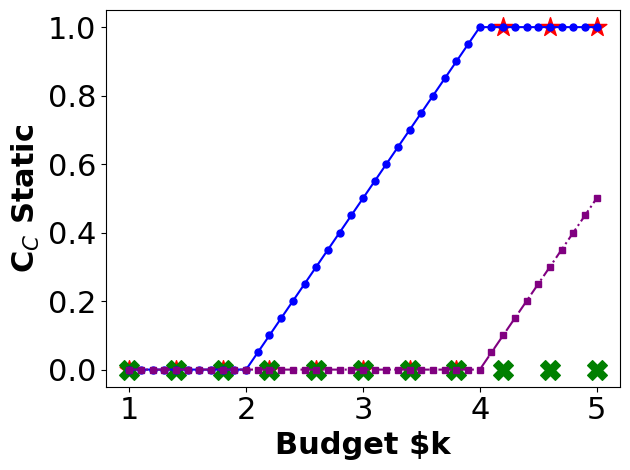

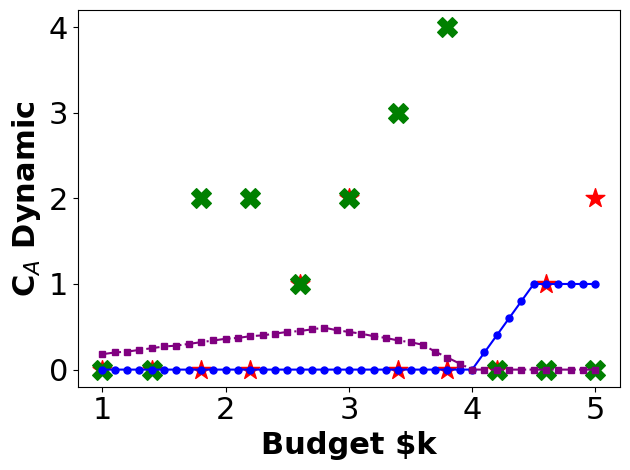

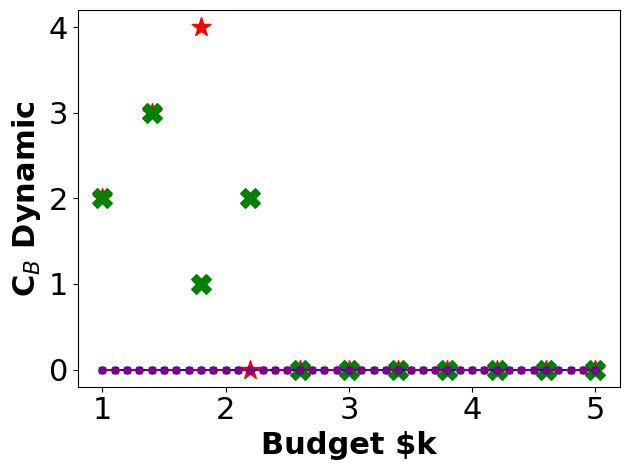

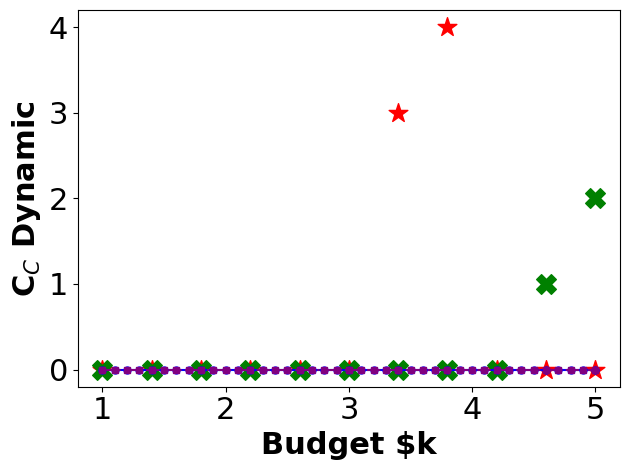

In [21]:
plot_solution(
            nlp_a_sol, # a list of solution for A-opt. LP problem, shape N_budget*6 (6 for CA, CB, CC as SCM and DCM)
            milp_a_sol, # a list of solution for A-opt. MILP problem , shape N_budget*6
            nlp_d_sol, # a list of solution for D-opt. NLP problem , shape N_budget*6
            minlp_d_sol) # a list of solution for D-opt. MINLP problem , shape N_budget*6

## Fig. 4, 7: Time and iterations

This draws Fig. 4 in kinetics case study and Fig. 7 in rotary bed case study. 

In [22]:
def read_time_iter(file_name, budgets, read_only_time=True):
    """
    read the time and iteration for D-optimality NLP and MINLP solutions, 
    and the time for A-optimality LP and MILP solutions
    
    Arguments
    ---------
    file_name: string name of result file 
        for A-optimality LP and MILP solutions, this file stores a list of solver times, 
        which is the same length of budgets
        for D-optimality NLP and MINLP solutions, this file stores a dictionary, 
        where the keys are the budget in budgets, the values are a dictionary, 
        where the key "t" has the value of the time, the key "n" has the value of the number of iterations 
        
        for e.g., given the budgets [1000, 5000],
        the A-optimality LP solution can be [1, 2], 
        which means that LP problem is solved in 1 second at budget 1000, 2 second at budget 5000 
        
        the D-optimality NLP solution can be {1000: {"t": 1, "n": 20}, 5000:{...}}
        which means that NLP problem is solved in 1 second and 20 iterations for budget 1000
        
    budgets: list, the budget ranges of the file name. Explained in the examples above 
    read_only_time: if True, read A-optimality LP and MINLP time file
        if not, read D-optimality NLP and MINLP file for both time and iteration
        
    Return 
    ------
    lp_time_r: a list of the solver time. returned when read_only_time is True 
    nlp_time: a list of the solver time. returned when read_only_time is False
    nlp_iter: a list of the No. of iterations. returned when read_only_time is False
    """
    if read_only_time: 
        # read the pickle
        with open(file_name, 'rb') as f:
            lp_time_r = pickle.load(f)
            f.close()
            
        # check if it has the same length as budget 
        if len(lp_time_r) != len(budgets):
            raise ValueError("Expecting "+str(len(budgets))+" elements in the array, but get length:", str(len(lp_time_r)))
            
        # return a list of the same length as budgets 
        return lp_time_r
    
    else:
        # read the dictionary for D-optimality 
        with open(file_name, 'rb') as f:
            nlp_dict = pickle.load(f)
            f.close()
        
        # initialize nlp_time to store the time as a list, nlp_iter to store the no. of iterations as a list
        nlp_time, nlp_iter = [], [] 

        # loop over budget in budgets
        for item in budgets:
            # retrieve time 
            nlp_time.append(nlp_dict[item]["t"])
            # retrieve no. of iterations
            nlp_iter.append(nlp_dict[item]["n"])

        return nlp_time, nlp_iter
        
    


In [23]:
def iteration(x, y, nlp=True, name=None):
    """
    Draw iteration figure 
    
    Arguments 
    ---------
    x: x axis value, the budget range 
    y: y axis value, the number of iterations
    nlp: if True, it uses the marker and color of NLP. if False, use the marker and color of MINLP
    name: if given a string, use this as the name for saving the figure. 
    """
    # font size for axes titles, axes labels, ticks
    si=24
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)
    
    # if nlp, use the nlp marker and color. 
    if nlp:
        plt.scatter(x, y, marker = "s", color=optD_color_nlp, s=150)
    # if minlp, use the minlp marker and color
    else:
        plt.scatter(x, y, marker=optD_scatter_minlp, s=200, color=optD_color_minlp)

    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Iterations', fontweight="bold")
    #plt.legend(loc="lower right", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()

### kinetics, Fig. 4

In [31]:

# read D-opt. NLP time and iteration
nlp_time_k, nlp_iter_k = read_time_iter(
                        'kinetics_time_iter_nlp', # string file name 
                        x_gurobi, # budget ranges
                        read_only_time = False) # read both time and iteration 
# read D-opt. MINLP time and iteration
minlp_time_k, minlp_iter_k = read_time_iter(
                        'kinetics_time_iter_minlp',  # string file name 
                        x_gurobi, # budget ranges
                        read_only_time = False)# read both time and iteration 

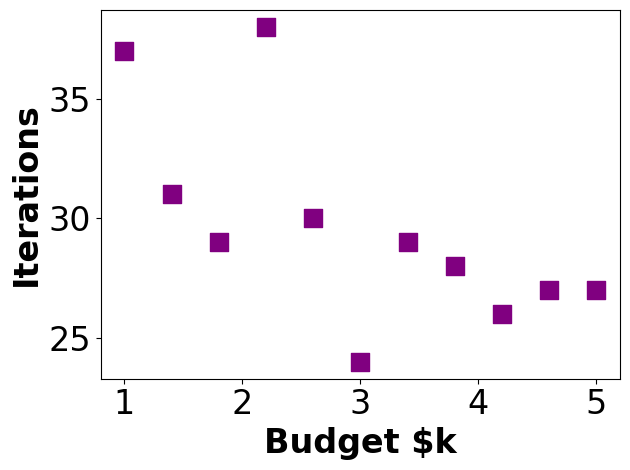

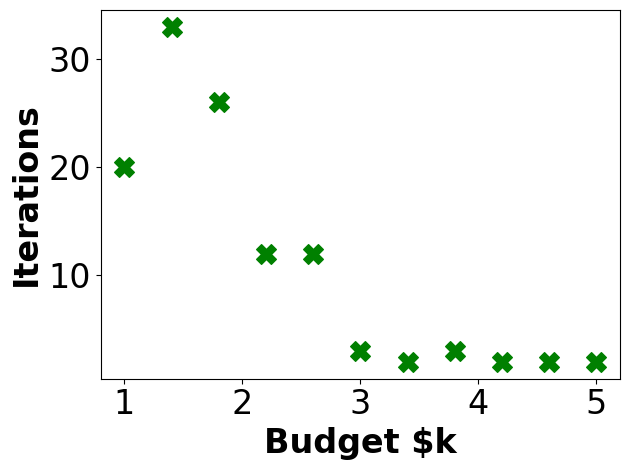

In [33]:
# plot NLP iterations
iteration(x_gurobi_legend, # x axis value, the budget range 
          nlp_iter_k, #y axis value, the number of iterations
          nlp=True, #if True, it uses the marker and color of NLP. if False, use the marker and color of MINLP
          name='kinetics_iter_nlp.pdf')#if given a string, use this as the name for saving the figure. 

# plot MINLP iterations
iteration(x_gurobi_legend, # x axis value, the budget range 
          minlp_iter_k, #y axis value, the number of iterations
          nlp=False, #if True, it uses the marker and color of NLP. if False, use the marker and color of MINLP
          name='kinetics_iter_minlp.pdf')#if given a string, use this as the name for saving the figure. 

### Rotary, Fig. 7

In [28]:
# read time and iteration for NLP 
nlp_time_r, nlp_iter_r = read_time_iter('rotary_time_iter_nlp', # file name 
                                        rotary_ranges, # budget ranges 
                                        read_only_time = False # read both time and iteration
                                        )
minlp_time_r, minlp_iter_r = read_time_iter('rotary_time_iter_minlp', # file name
                                            rotary_ranges, # budget ranges
                                           read_only_time = False) # read both time and iteration

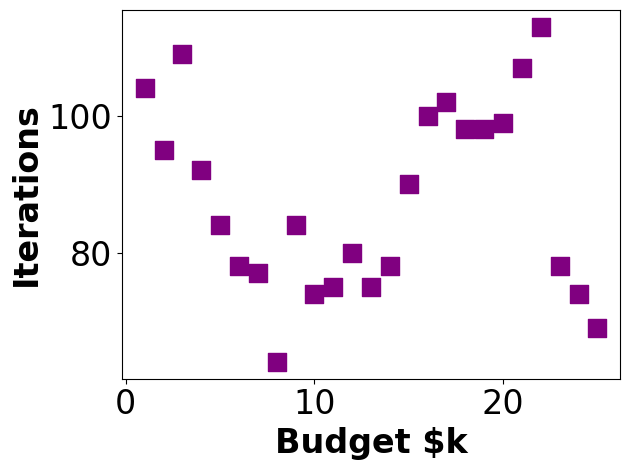

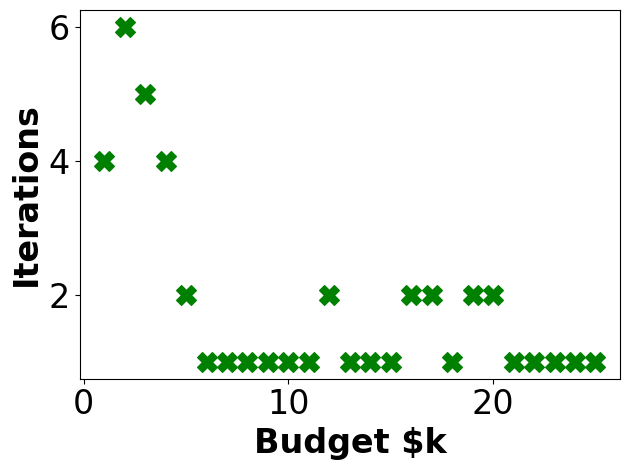

In [34]:
# plot NLP iterations
iteration(rotary_label, # x ranges for budgets
          nlp_iter_r, # list of iterations
          nlp=True, # use NLP markers and legends
          name='rotary_iter_nlp.pdf') # figure save name
# plot MINLP iterations
iteration(rotary_label, # x ranges for budgets
          minlp_iter_r, # list of iterations
          nlp=False, # use NLP markers and legends
          name='rotary_iter_minlp.pdf')# figure save name

### Time

Fig. 4 and Fig. 7 time figure

In [29]:
def plot_all_time(x, lp_time, nlp_time, milp_time, minlp_time, name):
    """
    Plot the solver time of all four optimization strategies 
    
    Arguments
    ---------
    x: x axis, a list of the budget 
    lp_time: a list of LP solver time 
    nlp_time: a list of NLP solver time 
    milp_time: a list of MILP solver time 
    minlp_time: a list of MINLP solver time 
    name: the string name for saving the figure 
    """
    
    label_minlp = "MILP maximizing A-optimality"

    label_nlp = "LP maximizing A-optimality" 
    color_minlp = "red"
    scatter_minlp = "*"
    color_nlp = "blue"
    scatter_nlp = "."
    marker_size=10


    optD_label_minlp = "MINLP maximizing D-optimality"
    optD_label_nlp = "NLP maximizing D-optimality"
    optD_color_minlp = "green"
    optD_scatter_minlp = "X"
    optD_color_nlp = "purple"
    optD_scatter_nlp = "s"
    optD_marker_size=5


    # font size for axes title, lables, and ticks 
    si=24
    plt.rc('axes', titlesize=si)
    plt.rc('axes', labelsize=si)
    plt.rc('xtick', labelsize=si)
    plt.rc('ytick', labelsize=si)

    # legend font size. not using legend in this figure but keep this for reference
    si_legend = 14

    # draw the time for LP problem
    plt.plot(x, lp_time, linestyle="-", color=color_nlp, markersize=marker_size, 
             marker=scatter_nlp, label=label_nlp)

    # time for MILP problem
    plt.plot(x, milp_time, linestyle="-.", color=optD_color_nlp, 
             markersize=optD_marker_size, marker=optD_scatter_nlp, label=optD_label_nlp)
    
    # time for NLP problem 
    plt.scatter(x, nlp_time, marker=scatter_minlp, s=200, 
                color=color_minlp, label=label_minlp)

    # time for MINLP problem
    plt.scatter(x, minlp_time, marker=optD_scatter_minlp, s=200, 
                color=optD_color_minlp, label=optD_label_minlp)


    plt.xlabel('Budget $k', fontweight="bold")
    plt.ylabel('Time [s]', fontweight="bold")
    #plt.legend(bbox_to_anchor=(0.12, 0.35), loc="center left", fontsize=si_legend)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()


### kinetics, Fig. 4

In [48]:
# read LP time
lp_time_k = read_time_iter("kinetics_time_lp", x_gurobi_legend)
# read MILP time
milp_time_k = read_time_iter("kinetics_time_milp", x_gurobi_legend)

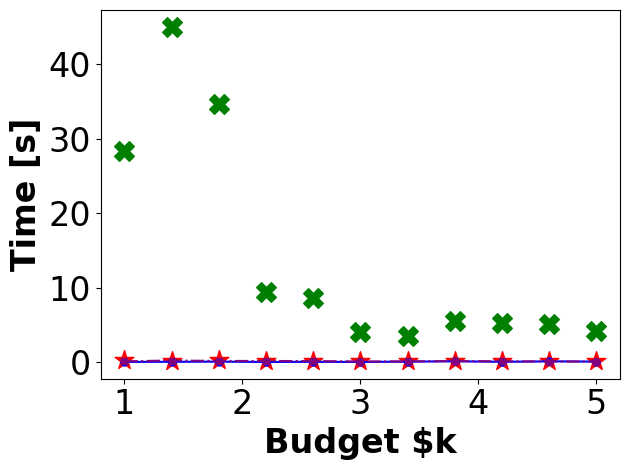

In [49]:
plot_all_time(x_gurobi_legend, # x axis label
              lp_time_k, # LP time 
              nlp_time_k, # NLP time 
              milp_time_k, # MILP time 
              minlp_time_k, # MINLP time 
              "kinetics_time.pdf") # figure save name

### Rotary, Fig. 7

In [44]:
# read LP time
lp_time_r = read_time_iter("rotary_time_lp", rotary_ranges)
# read MILP time 
milp_time_r = read_time_iter("rotary_time_milp", rotary_ranges)

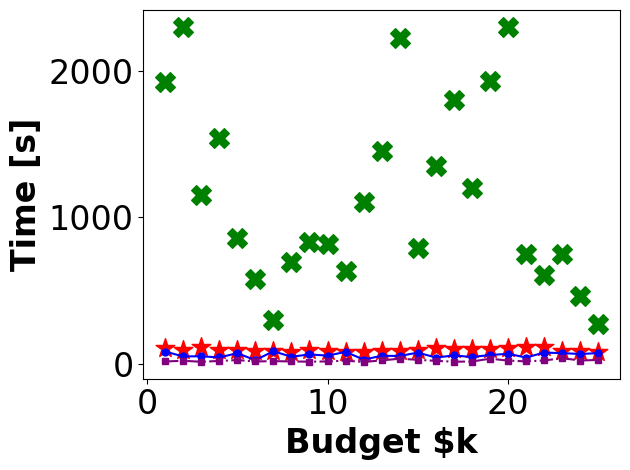

In [45]:
# plot rotary time 
plot_all_time(rotary_label, # x axis label
              lp_time_r, # LP time 
              nlp_time_r, # NLP time
              milp_time_r, # MILP time
              minlp_time_r, # MINLP time
              "rotary_time.pdf") # figure save name 